In [1]:
#Copyright: Keehwan Nam 2013, Dept of physics, KAIST., Daejeon, South Korea.
#You may use this source without any payment in any purpose, if providing copyright information.
#Reference: arXiv:1304.3690
#Please let me know if you find error, miatake, fault, and whatever you think strange.
#E-mail: snowall@kaist.ac.kr / snowall@gmail.com
#Under Python 2.7.3

import numpy as np

initH=1./np.sqrt(2.)
initT=1./np.sqrt(2.)

init_coin = np.array([initH, initT])

latticeSize = 200
lattice = np.zeros((latticeSize+1,2))

lattice[int(latticeSize/2)][0]=init_coin[0]
lattice[int(latticeSize/2)][1]=init_coin[1]

Hadamard = np.array([[1,1j],[1j,1]])/np.sqrt(2.)
H2 = np.array([[1,1],[1,-1]])/np.sqrt(2.)
pauli_x = np.array([[0,1],[1,0]])
pauli_y= np.array([[0,-1j],[1j,0]])
pauli_z= np.array([[1,0],[0,-1]])

given_coinOP= H2

def OPcoin(given_coin): # \hat C
	return np.inner(given_coinOP, given_coin)

def coinFlip(psi):
	return map(OPcoin, psi)

def OPshift(psi): # \hat S
    a= np.insert(psi[0][:-1],0,0)
    b= np.append(psi[1][1:],0)
    return (np.vstack((a,b))).transpose()

def OPu(psi): # \hat U
#     print(np.shape(psi))
#     print(np.shape(OPshift(OPcoin(psi))))
#     print(np.shape(OPcoin(psi)))
    return OPshift(OPcoin(psi))

def PROJcoin(given_coin):
	return (np.conjugate(given_coin[0])*given_coin[0]+np.conjugate(given_coin[1])*given_coin[1]).real

def PROJ(psi):
	return map(PROJcoin, psi)

def QW(psi, it, per, li):
	for k in range(it):
		if k%per==0:
			li.append(list(PROJ(psi))[1:-1])
		psi = OPu(psi)

result = []
QW(lattice, 100,1, result)


In [3]:
len(result)

100

In [4]:
import matplotlib.pyplot as plt

<BarContainer object of 199 artists>

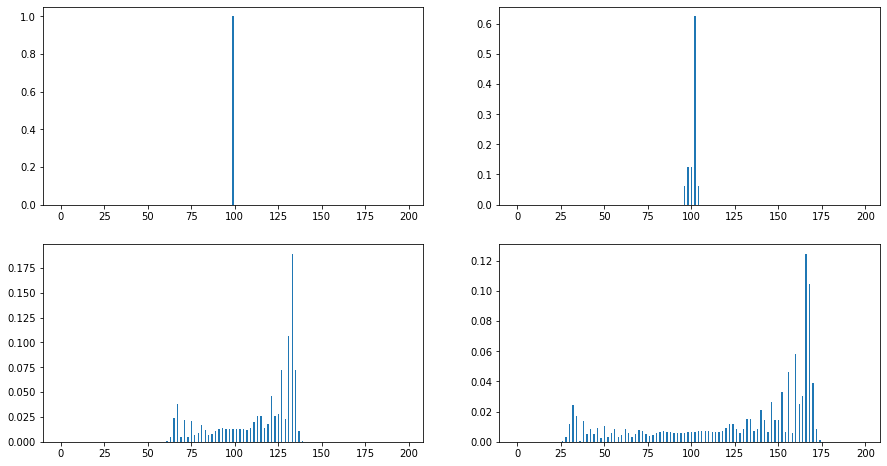

In [9]:
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.bar(range(0,199),result[0])

plt.subplot(222)
plt.bar(range(0,199),result[5])

plt.subplot(223)
plt.bar(range(0,199),result[50])

plt.subplot(224)
plt.bar(range(0,199),result[99])



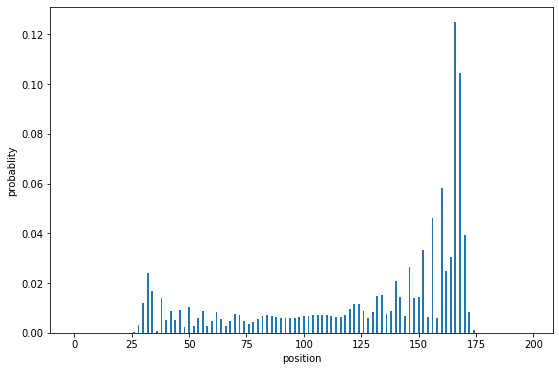

In [11]:

plt.figure(figsize=(9, 6))
plt.bar(range(0,199),result[99])

plt.xlabel('position')
plt.ylabel('probablity')
plt.savefig('1DQW_prob.png')